<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

DS-NTL-051324<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [4]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [5]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

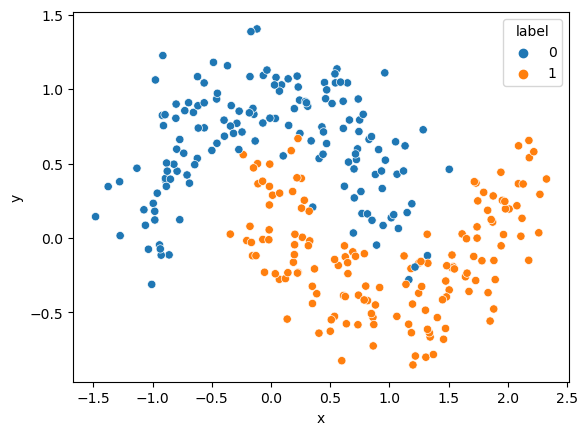

In [6]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [42]:
len(X)

300

In [8]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [9]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [10]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

2024-07-22 09:22:51.266059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [18]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 0s 31ms/step - loss: 0.6888 - accuracy: 0.5781 - auc: 0.6383 - val_loss: 0.6690 - val_accuracy: 0.6042 - val_auc: 0.6866
Epoch 2/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6678 - accuracy: 0.6146 - auc: 0.8020 - val_loss: 0.6497 - val_accuracy: 0.6458 - val_auc: 0.8009
Epoch 3/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.6406 - auc: 0.8600 - val_loss: 0.6313 - val_accuracy: 0.6875 - val_auc: 0.8455
Epoch 4/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.6510 - auc: 0.8822 - val_loss: 0.6140 - val_accuracy: 0.7500 - val_auc: 0.8696
Epoch 5/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6108 - accuracy: 0.6927 - auc: 0.8982 - val_loss: 0.5978 - val_accuracy: 0.7083 - val_auc: 0.8884
Epoch 6/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.7344 - auc: 0.9033 - val_loss: 0.5814 - 

6/6 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8698 - auc: 0.9475 - val_loss: 0.3279 - val_accuracy: 0.8125 - val_auc: 0.9554
Epoch 49/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.8698 - auc: 0.9476 - val_loss: 0.3257 - val_accuracy: 0.8125 - val_auc: 0.9563
Epoch 50/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8698 - auc: 0.9482 - val_loss: 0.3242 - val_accuracy: 0.8333 - val_auc: 0.9571
Epoch 51/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.8698 - auc: 0.9482 - val_loss: 0.3229 - val_accuracy: 0.8333 - val_auc: 0.9580
Epoch 52/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8698 - auc: 0.9487 - val_loss: 0.3212 - val_accuracy: 0.8333 - val_auc: 0.9589
Epoch 53/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8698 - auc: 0.9489 - val_loss: 0.3200 - val_accura

6/6 [==============================] - 0s 4ms/step - loss: 0.2796 - accuracy: 0.8854 - auc: 0.9578 - val_loss: 0.2742 - val_accuracy: 0.8750 - val_auc: 0.9741
Epoch 96/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.8854 - auc: 0.9579 - val_loss: 0.2739 - val_accuracy: 0.8750 - val_auc: 0.9741
Epoch 97/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.8854 - auc: 0.9581 - val_loss: 0.2730 - val_accuracy: 0.8750 - val_auc: 0.9750
Epoch 98/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8854 - auc: 0.9582 - val_loss: 0.2730 - val_accuracy: 0.8750 - val_auc: 0.9759
Epoch 99/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.8854 - auc: 0.9582 - val_loss: 0.2723 - val_accuracy: 0.8750 - val_auc: 0.9768
Epoch 100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.8802 - auc: 0.9582 - val_loss: 0.2702 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.8854 - auc: 0.9651 - val_loss: 0.2470 - val_accuracy: 0.8750 - val_auc: 0.9821
Epoch 143/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2544 - accuracy: 0.8854 - auc: 0.9652 - val_loss: 0.2466 - val_accuracy: 0.8750 - val_auc: 0.9821
Epoch 144/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.8854 - auc: 0.9656 - val_loss: 0.2469 - val_accuracy: 0.8750 - val_auc: 0.9821
Epoch 145/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2533 - accuracy: 0.8854 - auc: 0.9657 - val_loss: 0.2459 - val_accuracy: 0.8750 - val_auc: 0.9821
Epoch 146/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8854 - auc: 0.9658 - val_loss: 0.2450 - val_accuracy: 0.8750 - val_auc: 0.9821
Epoch 147/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.8854 - auc: 0.9660 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.8854 - auc: 0.9732 - val_loss: 0.2130 - val_accuracy: 0.8958 - val_auc: 0.9839
Epoch 190/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.8854 - auc: 0.9732 - val_loss: 0.2123 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 191/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.8854 - auc: 0.9734 - val_loss: 0.2119 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 192/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.8906 - auc: 0.9737 - val_loss: 0.2109 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 193/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2188 - accuracy: 0.8958 - auc: 0.9740 - val_loss: 0.2099 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 194/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2181 - accuracy: 0.8958 - auc: 0.9741 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9219 - auc: 0.9823 - val_loss: 0.1769 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 237/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9167 - auc: 0.9820 - val_loss: 0.1755 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 238/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9219 - auc: 0.9822 - val_loss: 0.1746 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 239/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9219 - auc: 0.9823 - val_loss: 0.1750 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 240/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9271 - auc: 0.9824 - val_loss: 0.1742 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 241/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9271 - auc: 0.9830 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9427 - auc: 0.9892 - val_loss: 0.1490 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 284/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9427 - auc: 0.9894 - val_loss: 0.1486 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 285/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.9427 - auc: 0.9893 - val_loss: 0.1479 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 286/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1540 - accuracy: 0.9427 - auc: 0.9895 - val_loss: 0.1478 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 287/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1535 - accuracy: 0.9427 - auc: 0.9899 - val_loss: 0.1474 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 288/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1530 - accuracy: 0.9427 - auc: 0.9899 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1330 - accuracy: 0.9531 - auc: 0.9927 - val_loss: 0.1291 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 331/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1325 - accuracy: 0.9531 - auc: 0.9930 - val_loss: 0.1288 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 332/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9531 - auc: 0.9929 - val_loss: 0.1276 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 333/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9531 - auc: 0.9929 - val_loss: 0.1278 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 334/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9531 - auc: 0.9930 - val_loss: 0.1283 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 335/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9531 - auc: 0.9930 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1160 - accuracy: 0.9583 - auc: 0.9943 - val_loss: 0.1154 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 378/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1156 - accuracy: 0.9583 - auc: 0.9944 - val_loss: 0.1151 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 379/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1153 - accuracy: 0.9583 - auc: 0.9944 - val_loss: 0.1148 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 380/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1150 - accuracy: 0.9583 - auc: 0.9944 - val_loss: 0.1150 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 381/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9583 - auc: 0.9945 - val_loss: 0.1153 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1145 - accuracy: 0.9583 - auc: 0.9945 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1033 - accuracy: 0.9583 - auc: 0.9957 - val_loss: 0.1054 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 425/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1030 - accuracy: 0.9583 - auc: 0.9958 - val_loss: 0.1055 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 426/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9583 - auc: 0.9958 - val_loss: 0.1054 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 427/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9583 - auc: 0.9958 - val_loss: 0.1053 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 428/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1023 - accuracy: 0.9531 - auc: 0.9959 - val_loss: 0.1054 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 429/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9531 - auc: 0.9959 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0938 - accuracy: 0.9583 - auc: 0.9968 - val_loss: 0.0995 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 472/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0937 - accuracy: 0.9583 - auc: 0.9968 - val_loss: 0.0989 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 473/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0935 - accuracy: 0.9583 - auc: 0.9967 - val_loss: 0.0985 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 474/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9583 - auc: 0.9968 - val_loss: 0.0987 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 475/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0931 - accuracy: 0.9583 - auc: 0.9968 - val_loss: 0.0989 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 476/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9583 - auc: 0.9968 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0951 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 519/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0945 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 520/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0947 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 521/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0945 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 522/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0948 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 523/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9635 - auc: 0.9975 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0921 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 566/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0921 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 567/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0924 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 568/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0921 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 569/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0808 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0917 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 570/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0909 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 613/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 614/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0904 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 615/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0767 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 616/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 617/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0768 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0902 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 660/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0910 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0900 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0895 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9688 - auc: 0.9977 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0897 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 707/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0897 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 708/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0710 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 709/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 710/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0898 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 711/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0706 - accuracy: 0.9688 - auc: 0.9979 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 754/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0687 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0893 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 755/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0900 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 756/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 757/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0896 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 758/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0684 - accuracy: 0.9688 - auc: 0.9979 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0669 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0906 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 801/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0897 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 802/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0666 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 803/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0664 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0897 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 804/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0891 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 805/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9980 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0898 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 848/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0903 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 849/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0902 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 850/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0906 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 851/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0906 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 852/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 0.9688 - auc: 0.9982 - val_loss

Epoch 894/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0902 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 895/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9688 - auc: 0.9983 - val_loss: 0.0900 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 896/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0902 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 897/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0908 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 898/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0909 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9688 - auc: 0.9981 - val_loss

In [45]:
len(X_train)

240

In [19]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

2/2 [==============================] - 0s 6ms/step


array([[9.9992079e-01],
       [9.9904633e-01],
       [9.7919428e-01],
       [9.9937630e-01],
       [1.0707416e-06]], dtype=float32)

In [20]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [21]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988775849342346


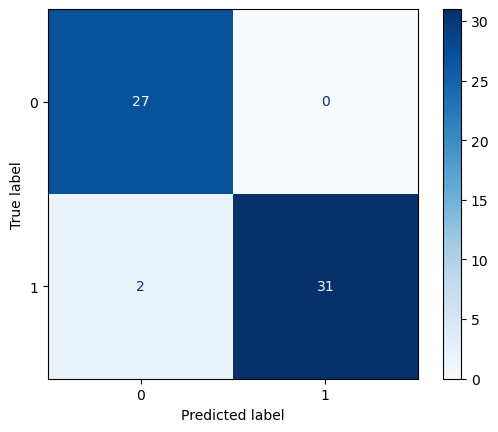

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

80/80 [==============================] - 0s 502us/step


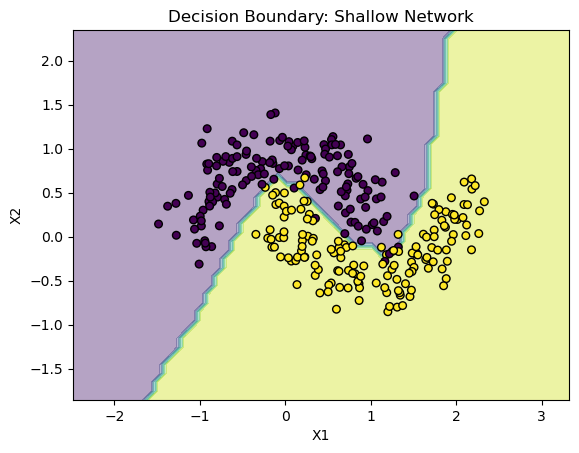

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [24]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.688781,0.578125,0.638268,0.668953,0.604167,0.686607
1,0.667779,0.614583,0.801953,0.649696,0.645833,0.800893
2,0.647437,0.640625,0.860041,0.631293,0.687500,0.845536
3,0.628754,0.651042,0.882241,0.614028,0.750000,0.869643
4,0.610836,0.692708,0.898167,0.597784,0.708333,0.888393


Plotting history:

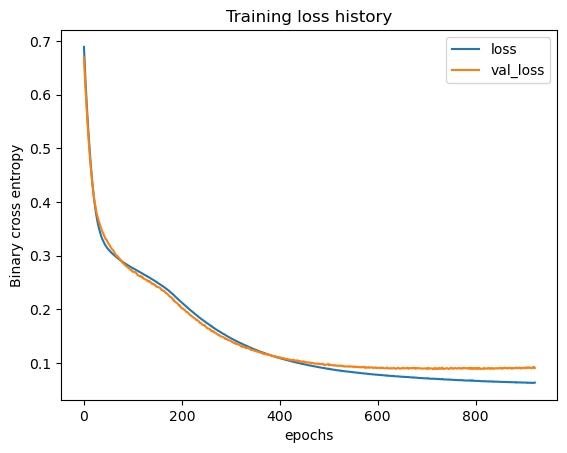

In [25]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

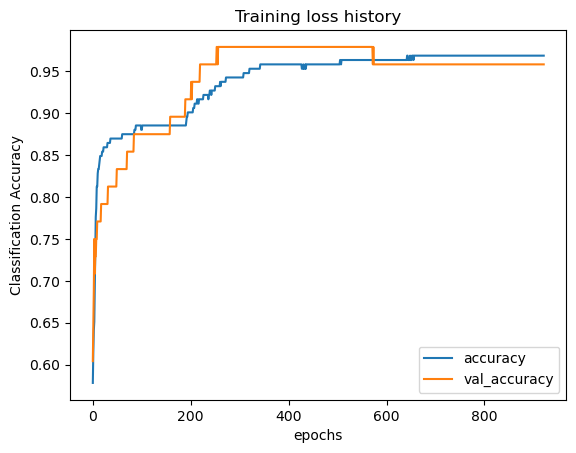

In [26]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [27]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [28]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

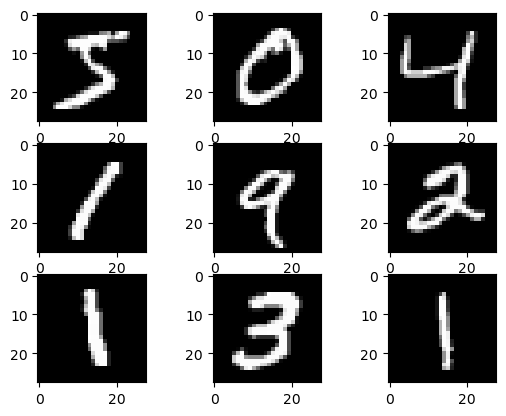

In [29]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [30]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [31]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [32]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [33]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [34]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5622 - accuracy: 0.8286 - val_loss: 0.2619 - val_accuracy: 0.9284
Epoch 2/100
1500/1500 [==============================] - 1s 963us/step - loss: 0.2275 - accuracy: 0.9358 - val_loss: 0.1897 - val_accuracy: 0.9460
Epoch 3/100
1500/1500 [==============================] - 1s 945us/step - loss: 0.1732 - accuracy: 0.9501 - val_loss: 0.1565 - val_accuracy: 0.9551
Epoch 4/100
1500/1500 [==============================] - 1s 947us/step - loss: 0.1461 - accuracy: 0.9572 - val_loss: 0.1423 - val_accuracy: 0.9589
Epoch 5/100
1500/1500 [==============================] - 1s 964us/step - loss: 0.1252 - accuracy: 0.9637 - val_loss: 0.1382 - val_accuracy: 0.9602
Epoch 6/100
1500/1500 [==============================] - 1s 944us/step - loss: 0.1109 - accuracy: 0.9674 - val_loss: 0.1462 - val_accuracy: 0.9579
Epoch 7/100
1500/1500 [==============================] - 1s 943us/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.1

1500/1500 [==============================] - 1s 944us/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.2881 - val_accuracy: 0.9619
Epoch 57/100
1500/1500 [==============================] - 1s 937us/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.2932 - val_accuracy: 0.9611
Epoch 58/100
1500/1500 [==============================] - 1s 950us/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.3069 - val_accuracy: 0.9603
Epoch 59/100
1500/1500 [==============================] - 1s 943us/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.2997 - val_accuracy: 0.9601
Epoch 60/100
1500/1500 [==============================] - 1s 947us/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.3418 - val_accuracy: 0.9563
Epoch 61/100
1500/1500 [==============================] - 1s 944us/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.3086 - val_accuracy: 0.9615
Epoch 62/100
1500/1500 [==============================] - 1s 946us/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.3260 

In [35]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

313/313 [==============================] - 0s 560us/step


array([[2.47058961e-23, 1.51883341e-14, 5.49714015e-14, ...,
        1.00000000e+00, 6.66229874e-24, 2.69481393e-15],
       [5.75152735e-16, 1.18759281e-15, 1.00000000e+00, ...,
        6.38487485e-29, 2.99420027e-20, 0.00000000e+00],
       [1.47487643e-12, 9.99996185e-01, 1.91837535e-06, ...,
        3.06750110e-07, 1.49419316e-06, 9.62302252e-11],
       ...,
       [1.49830774e-35, 5.35015089e-21, 3.95949366e-33, ...,
        3.12874338e-10, 5.05289204e-15, 3.28588312e-09],
       [0.00000000e+00, 4.03246928e-37, 0.00000000e+00, ...,
        5.35305664e-26, 1.01374855e-11, 4.66788995e-29],
       [5.18339095e-20, 0.00000000e+00, 1.27741195e-35, ...,
        0.00000000e+00, 8.08397898e-33, 2.73578204e-28]], dtype=float32)

In [36]:
y_proba[0]

array([2.4705896e-23, 1.5188334e-14, 5.4971402e-14, 1.4238156e-11,
       4.1945071e-32, 3.7148631e-26, 0.0000000e+00, 1.0000000e+00,
       6.6622987e-24, 2.6948139e-15], dtype=float32)

In [37]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.27440154552459717, 0.9634000062942505]

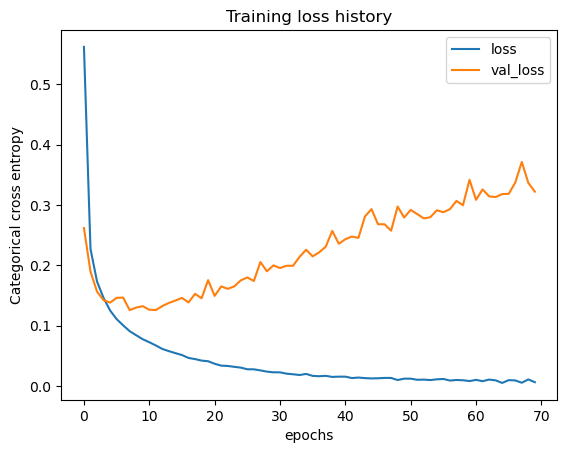

In [38]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

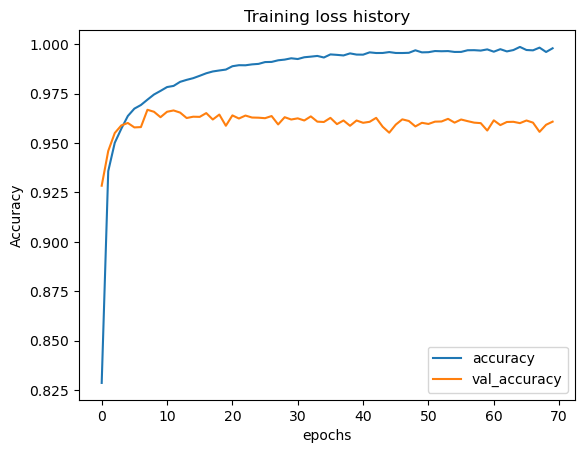

In [39]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [40]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

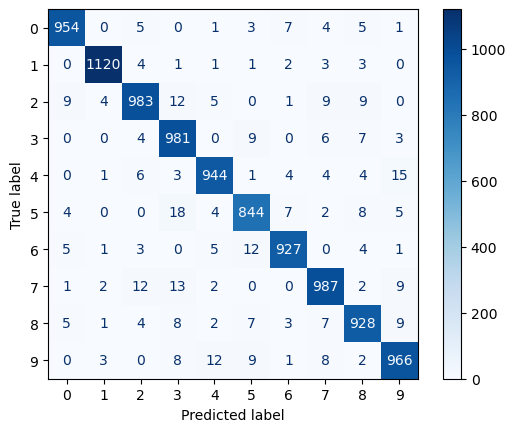

In [41]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>